In [2]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


__Deep dive into the data__

__Read the dataset and print the first few years__

In [3]:
df = pd.read_csv('NBA_Dataset_csv.csv')
df.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [4]:
print(f"The shape of the dataframe is: {df.shape}")

The shape of the dataframe is: (159, 7)


In [5]:
print(f"The following are the descriptive statistics")

print("Following are some of the insights")
print(" > The max value for Weightlifting_Sessions_Average is strange \n > There are some missing values")
df.describe().T

The following are the descriptive statistics
Following are some of the insights
 > The max value for Weightlifting_Sessions_Average is strange 
 > There are some missing values


,count,mean,std,min,25%,50%,75%,max
Points_Scored,159.0,119.327044,52.354983,0.0,96.5,125.0,151.5,250.0
Weightlifting_Sessions_Average,150.0,7433.120000,90719.720242,8.0,19.0,24.0,33.0,1111111.0
Yoga_Sessions_Average,139.0,21.690647,11.439728,3.0,13.0,19.0,28.0,63.0
Laps_Run_Per_Practice_Average,145.0,30.972414,11.979117,9.0,23.0,29.0,40.0,68.0
Water_Intake,145.0,3.648276,1.804820,1.0,2.0,3.0,5.0,8.0
Players_Absent_For_Sessions,130.0,4.415385,2.202129,1.0,3.0,4.0,6.0,8.0


In [6]:
print(f"The following is the dataframe information")
df.info()

The following is the dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [7]:
print(f"The following are the columns of the dataframe \n{df.columns}")

The following are the columns of the dataframe 
Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')


In [8]:
#renaming required columns since they are very large
df=df.rename(columns={'Points_Scored':'Points','Weightlifting_Sessions_Average':'WL','Yoga_Sessions_Average':'Yoga',
                        'Laps_Run_Per_Practice_Average':'Laps','Water_Intake':'WI',
                        'Players_Absent_For_Sessions':'PAFS'})
df.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

__Distribution plot__

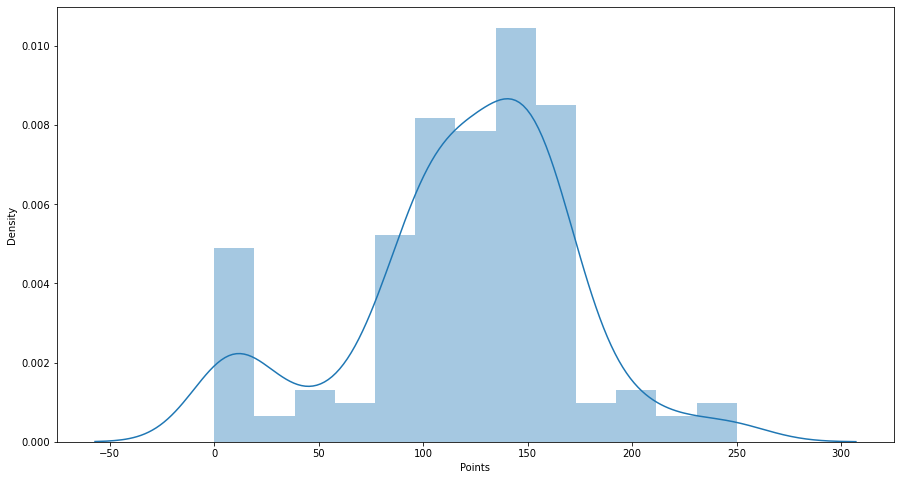

In [9]:
plt.figure(figsize=(15,8))
sns.distplot(df.Points)
plt.show()

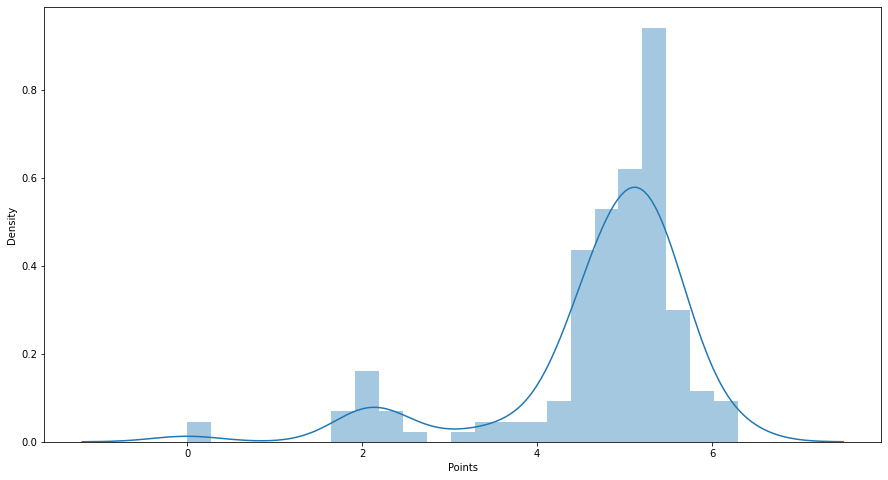

In [10]:
plt.figure(figsize=(15,8))
sns.distplot(np.cbrt(df.Points))
plt.show()

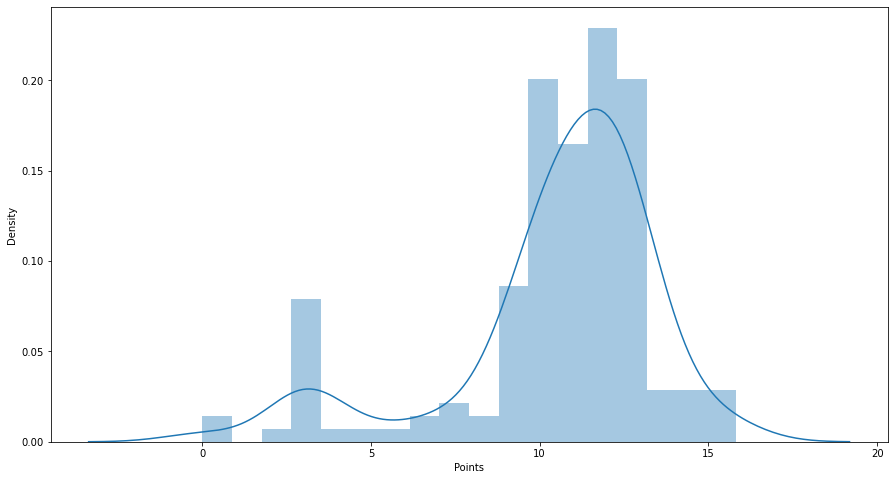

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(np.sqrt(df.Points))
plt.show()

In [12]:
print("The best representation was the original")

The best representation was the original


__Boxplot and violin plot__

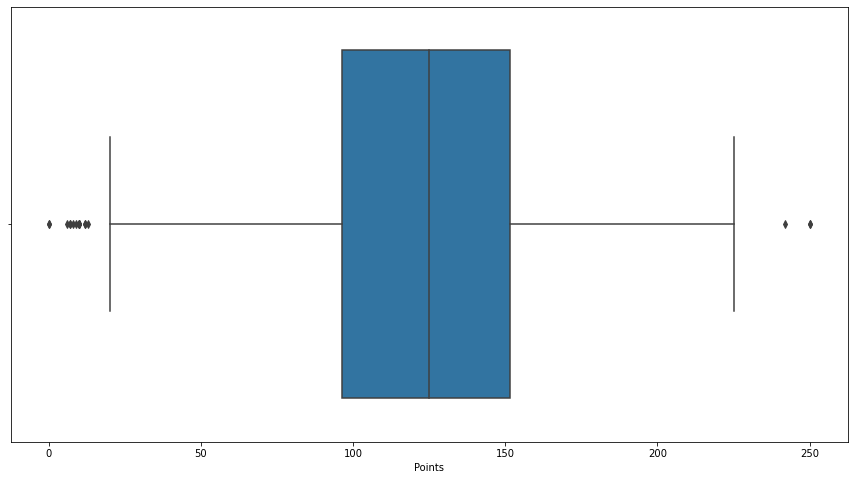

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(df.Points)
plt.show()

In [14]:
#function for plotting violin plots
def plotting_box_violin_plots(df,x,y):
    fig,axes=plt.subplots(1,2,figsize=(18,10))
    fig.suptitle("Violin and box plots for variable : {}".format(y))

    sns.violinplot(ax=axes[0],x=x,y=y,data=df)
    sns.boxplot(ax=axes[1],data=df[y])

    axes[0].set_title("Violin plot for variable : {}".format(y))
    axes[1].set_title("Box plot for variable : {}".format(y))

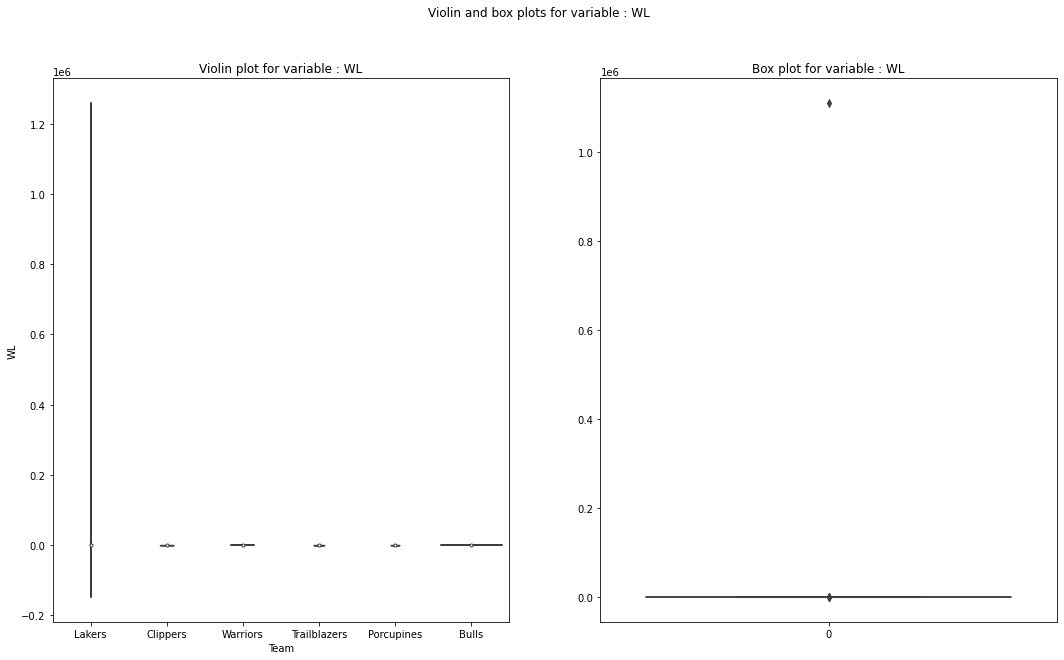

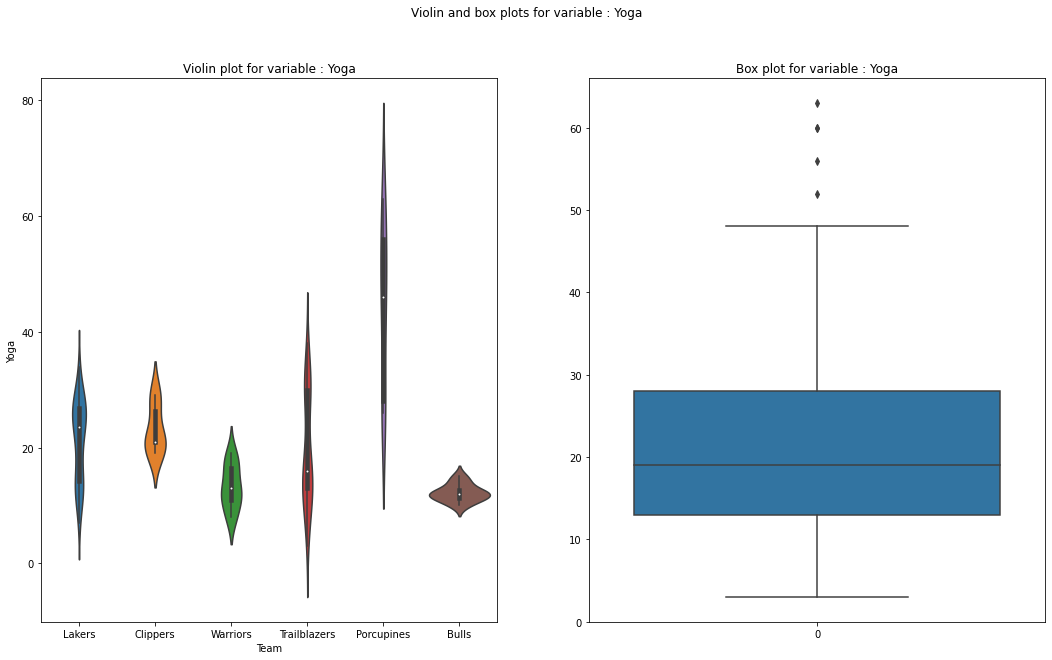

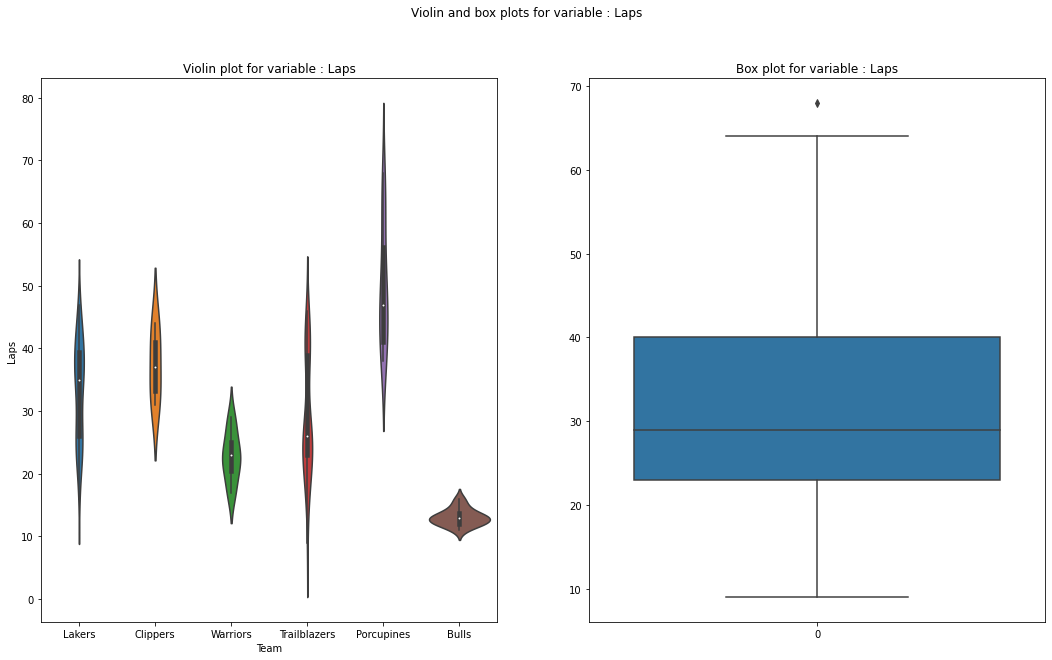

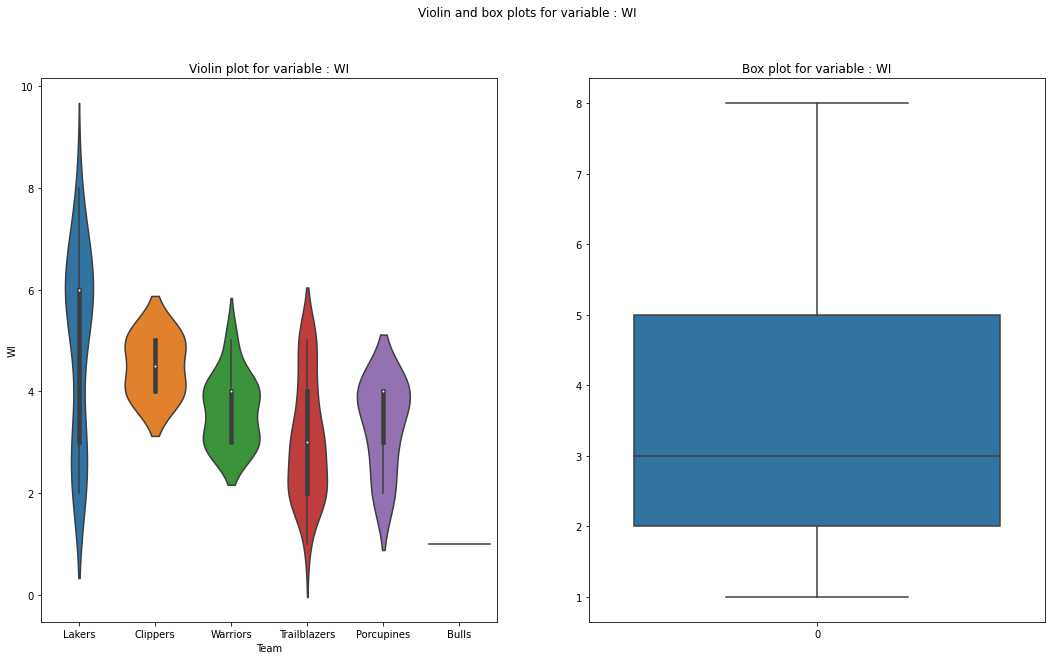

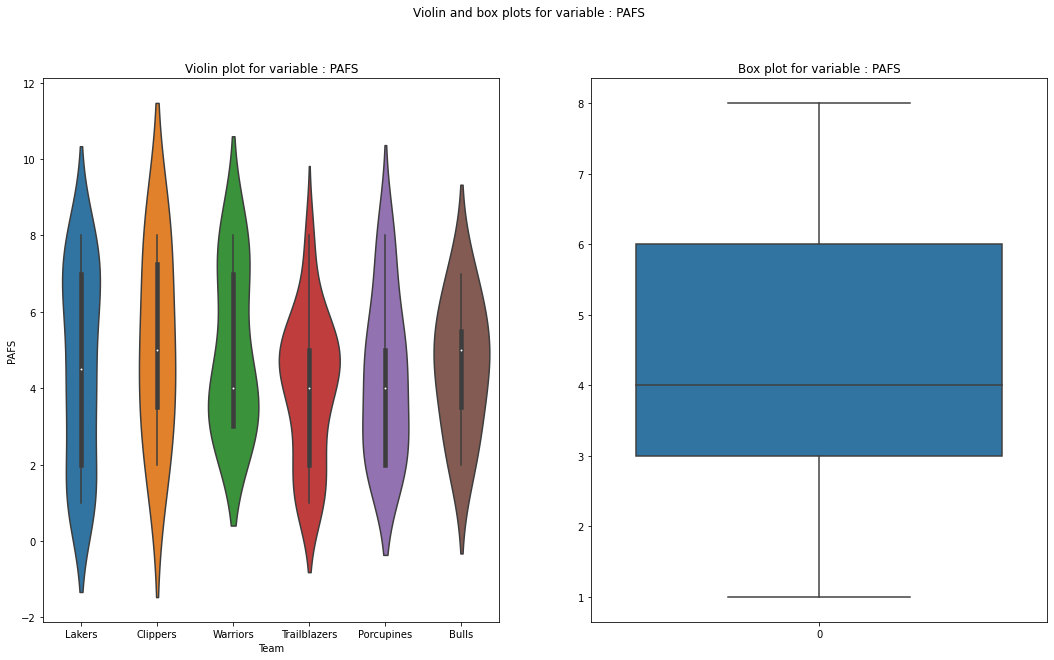

In [15]:
for x in ['WL','Yoga','Laps','WI','PAFS']:
    plotting_box_violin_plots(df,"Team",x)

__Outlier detection__

In [16]:
def find_outliers(df,column):
    q_1 = df[column].quantile(0.25)
    q_3 = df[column].quantile(0.75)
    IQR = q_3 - q_1
    upper_end = q_3 + 1.5*IQR
    lower_end = q_1 - 1.5*IQR
    outlier = df[column][(df[column]>upper_end)| (df[column]<lower_end)]
    return outlier

In [17]:
for x in ['WL','Yoga','Laps','WI','PAFS']:
    print(f"\n Outliers in the column {x}" )
    outliers = find_outliers(df,x)
    print(outliers)


 Outliers in the column WL
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in the column Yoga
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outliers in the column Laps
144    68.0
Name: Laps, dtype: float64

 Outliers in the column WI
Series([], Name: WI, dtype: float64)

 Outliers in the column PAFS
Series([], Name: PAFS, dtype: float64)


__Outlier treatment__

In [18]:
df_clean = df.drop([142,143,144])

In [19]:
df_clean.shape

(156, 7)

In [20]:
df['WL'][df['WL'] == 1111111.0]

8    1111111.0
Name: WL, dtype: float64

In [21]:
df['WL'][df['WL'] == 1111111.0] = np.nan

In [22]:
df_clean['WL'][df_clean['WL'] == 1111111.0] = np.nan

__Missing values Imputation Technique__

In [23]:
ncounts = pd.DataFrame(df_clean.isna().mean()).rename(columns={0:'missing_value'})
ncounts

,missing_value
Team,0.000000
Points,0.000000
WL,0.064103
Yoga,0.128205
Laps,0.089744
WI,0.089744
PAFS,0.185897


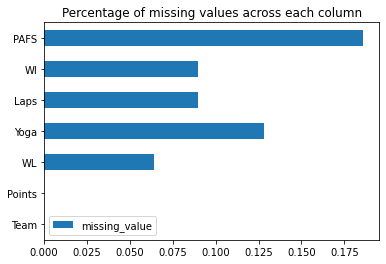

In [24]:
ncounts.plot(kind = 'barh',title = 'Percentage of missing values across each column')
plt.show()

In [25]:
df_clean.shape, df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

__Pandas Imputer__

In [26]:
df.isnull().sum()

Team       0
Points     0
WL        10
Yoga      20
Laps      14
WI        14
PAFS      29
dtype: int64

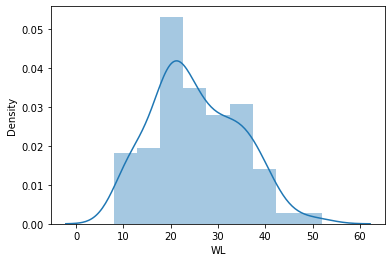

In [27]:
sns.distplot(df_clean['WL'])
plt.show()

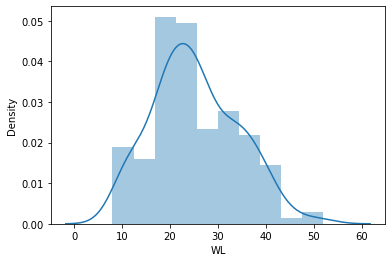

In [28]:
sns.distplot(df_clean['WL'].fillna(df_clean.WL.mean()))
plt.show()

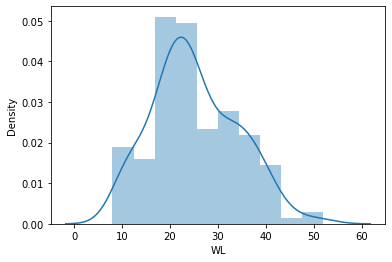

In [29]:
sns.distplot(df_clean['WL'].fillna(df_clean.WL.median()))
plt.show()

In [30]:
#Groupby team

mean_WL=df_clean.groupby("Team")['WL'].mean().to_dict()

In [31]:
WL_series= df_clean['WL'].astype('str').replace(mean_WL)

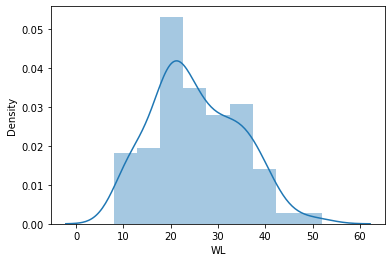

In [32]:
sns.distplot(df_clean['WL'].astype('str').replace(mean_WL))
plt.show()

__Iterative and KNN imputers__

In [33]:
# Simple imputer
features = ['WL','Yoga','Laps','WI','PAFS']
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [34]:
df.isnull().sum()

Team       0
Points     0
WL        10
Yoga      20
Laps      14
WI        14
PAFS      29
dtype: int64

In [35]:
# Fit and transform
si_imp = imp.fit_transform(df_clean[features])
si_imp_df = pd.DataFrame(si_imp,columns=features)
si_imp_df


,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


In [36]:
si_imp_df.isnull().isnull().sum()

WL      0
Yoga    0
Laps    0
WI      0
PAFS    0
dtype: int64

In [37]:
# Iterative Imputer
from sklearn.experimental import enable_iterative_imputer

In [38]:
from sklearn.impute import IterativeImputer
ITI = IterativeImputer(max_iter=10)
# fit and transform
ITI_imp = ITI.fit_transform(df_clean[features])
ITI_imp_df = pd.DataFrame(ITI_imp,columns=features)
ITI_imp_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.063002,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.413163
152,12.0,12.000000,14.0,1.0,4.413298
153,12.0,13.000000,14.0,1.0,4.413450
154,13.0,14.000000,15.0,1.0,6.000000


In [39]:
# Knn imputer
from sklearn.impute import KNNImputer
# KNN Imputer 

from sklearn.impute import KNNImputer

KNN=KNNImputer(n_neighbors=3)

#Fit & Transform

KNN_impt=KNN.fit_transform(df_clean[features])

KNN_impt_df=pd.DataFrame(KNN_impt,columns=features)

KNN_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.666667,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.666667
152,12.0,12.000000,14.0,1.0,5.333333
153,12.0,13.000000,14.0,1.0,6.000000
154,13.0,14.000000,15.0,1.0,6.000000


__LGBM Imputer__

In [40]:
#!git clone https://github.com/analokmaus/kuma_utils.git


In [41]:
import sys
sys.path.append('kuma_utils/')

In [42]:
conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [43]:
from kuma_utils.preprocessing.imputer import LGBMImputer

In [44]:
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)
df_itr=lgbm_itr.fit_transform(df_clean[features])
df_itr_df=pd.DataFrame(df_itr,columns=features)
df_itr_df

  0%|          | 0/5 [00:00<?, ?it/s]

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,24.357742,34.0,5.0,6.000000
...,...,...,...,...,...
154,12.0,12.000000,13.0,1.0,3.805411
155,12.0,12.000000,14.0,1.0,3.805411
156,12.0,13.000000,14.0,1.0,3.953409
157,13.0,14.000000,15.0,1.0,6.000000


In [45]:
# we are going to use the lgbm missing values imputed data
df_new = df_itr_df.copy()
df_new

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,24.357742,34.0,5.0,6.000000
...,...,...,...,...,...
154,12.0,12.000000,13.0,1.0,3.805411
155,12.0,12.000000,14.0,1.0,3.805411
156,12.0,13.000000,14.0,1.0,3.953409
157,13.0,14.000000,15.0,1.0,6.000000


__Univariate analysis__

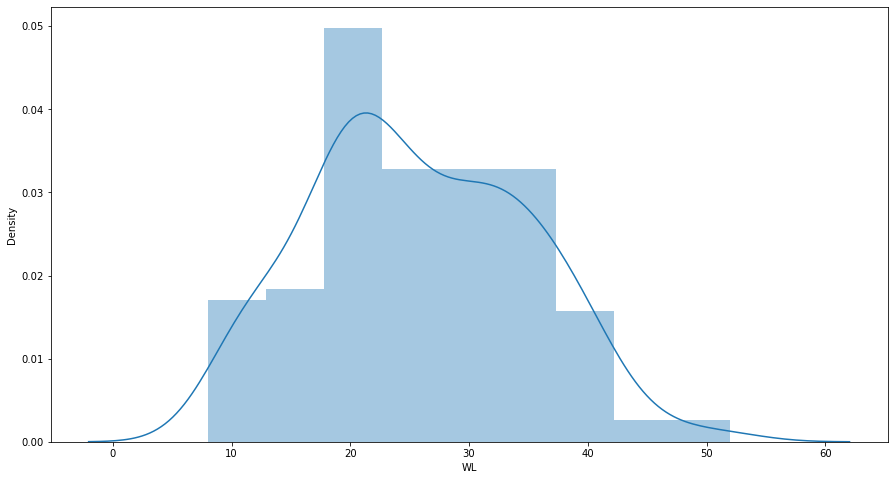

In [46]:
plt.figure(figsize=(15,8))
sns.distplot(df_new.WL)
plt.show()

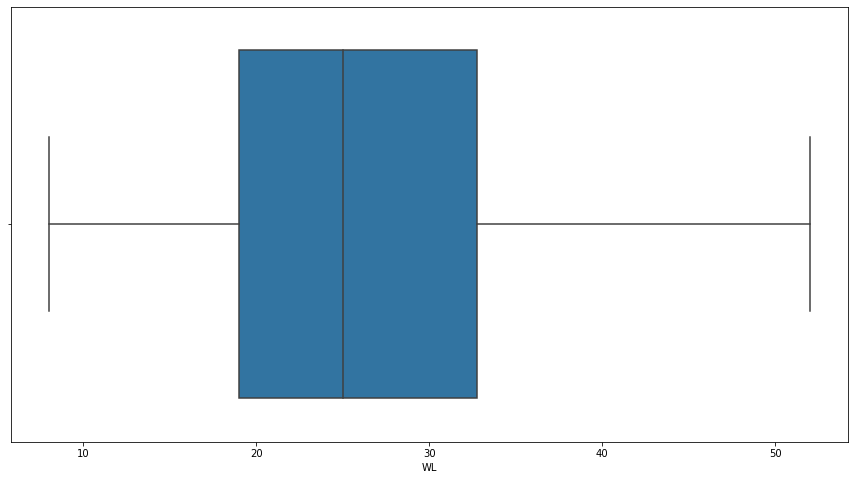

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(df_new.WL)
plt.show()

<AxesSubplot:>

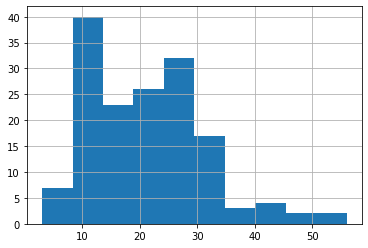

In [48]:
df_new['Yoga'].hist()

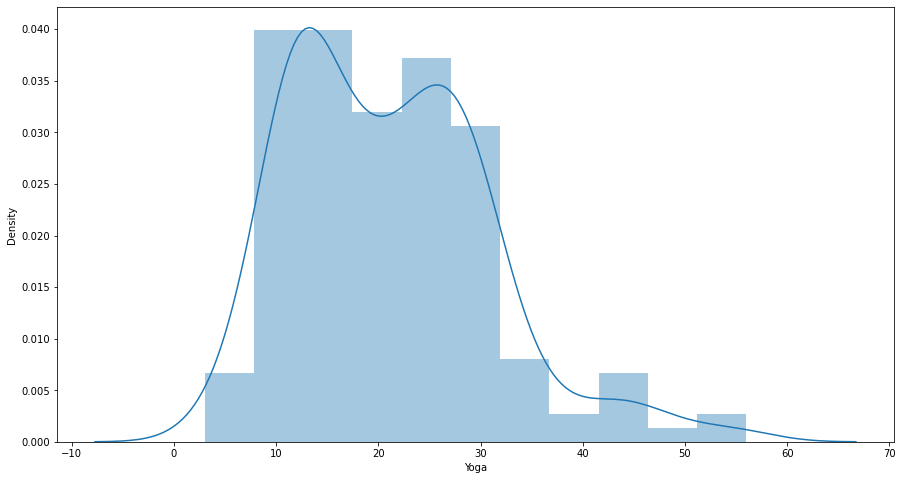

In [49]:
plt.figure(figsize=(15,8))
sns.distplot(df_new.Yoga)
plt.show()

__Linear correlation__

In [50]:
df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [51]:
df_clean.columns,df_new.columns

(Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object'),
 Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object'))

In [52]:
df_new['Team'] = df_clean.Team
df_new['Points'] = df_clean.Points

In [53]:
df_new.sample(5)

,WL,Yoga,Laps,WI,PAFS,Team,Points
17,30.0,25.000000,39.000000,6.00000,8.000000,Lakers,147
135,40.0,42.008496,46.000000,4.53125,2.000000,Porcupines,96
106,26.0,21.775080,33.923580,3.00000,3.386584,Trailblazers,250
110,32.0,24.000000,37.000000,4.00000,4.897022,Trailblazers,96
126,40.0,35.000000,48.203538,5.00000,6.000000,Trailblazers,120


In [54]:
df_new.corr()

,WL,Yoga,Laps,WI,PAFS,Points
WL,1.000000,0.940899,0.989656,0.716546,0.001012,0.448556
Yoga,0.940899,1.000000,0.927862,0.617798,0.026512,0.343593
Laps,0.989656,0.927862,1.000000,0.776036,0.024935,0.479233
WI,0.716546,0.617798,0.776036,1.000000,0.129837,0.425148
PAFS,0.001012,0.026512,0.024935,0.129837,1.000000,0.048566
Points,0.448556,0.343593,0.479233,0.425148,0.048566,1.000000


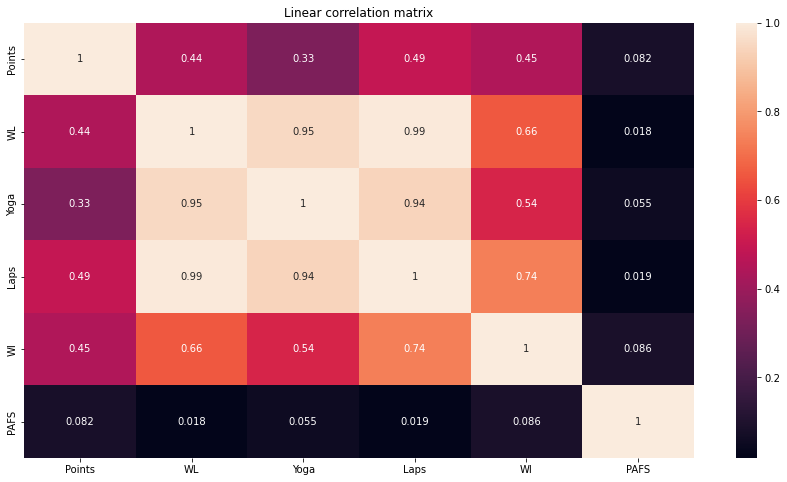

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Linear correlation matrix')
plt.show()

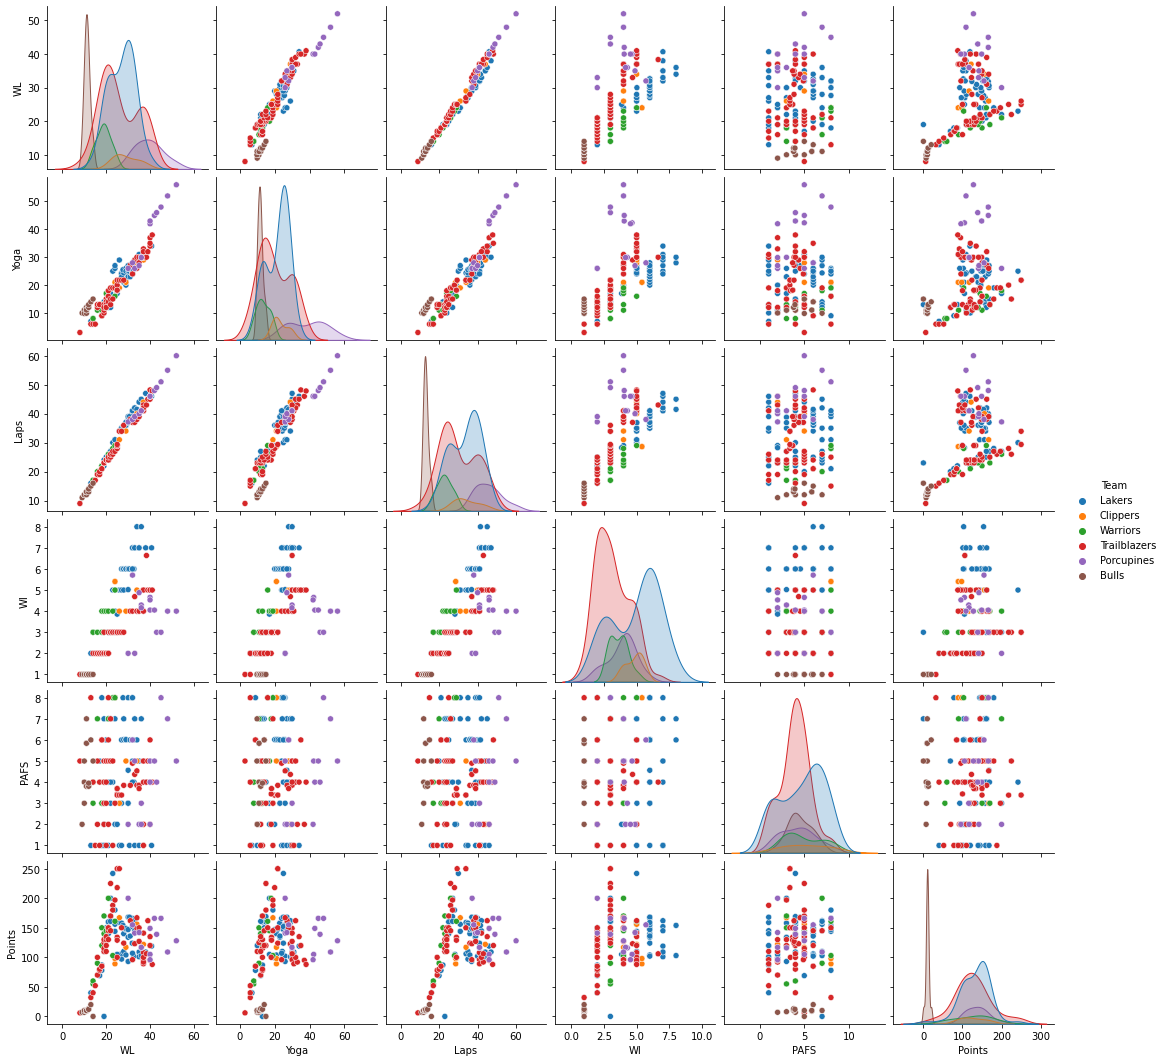

In [56]:
sns.pairplot(df_new,kind='scatter',hue='Team')
plt.show()

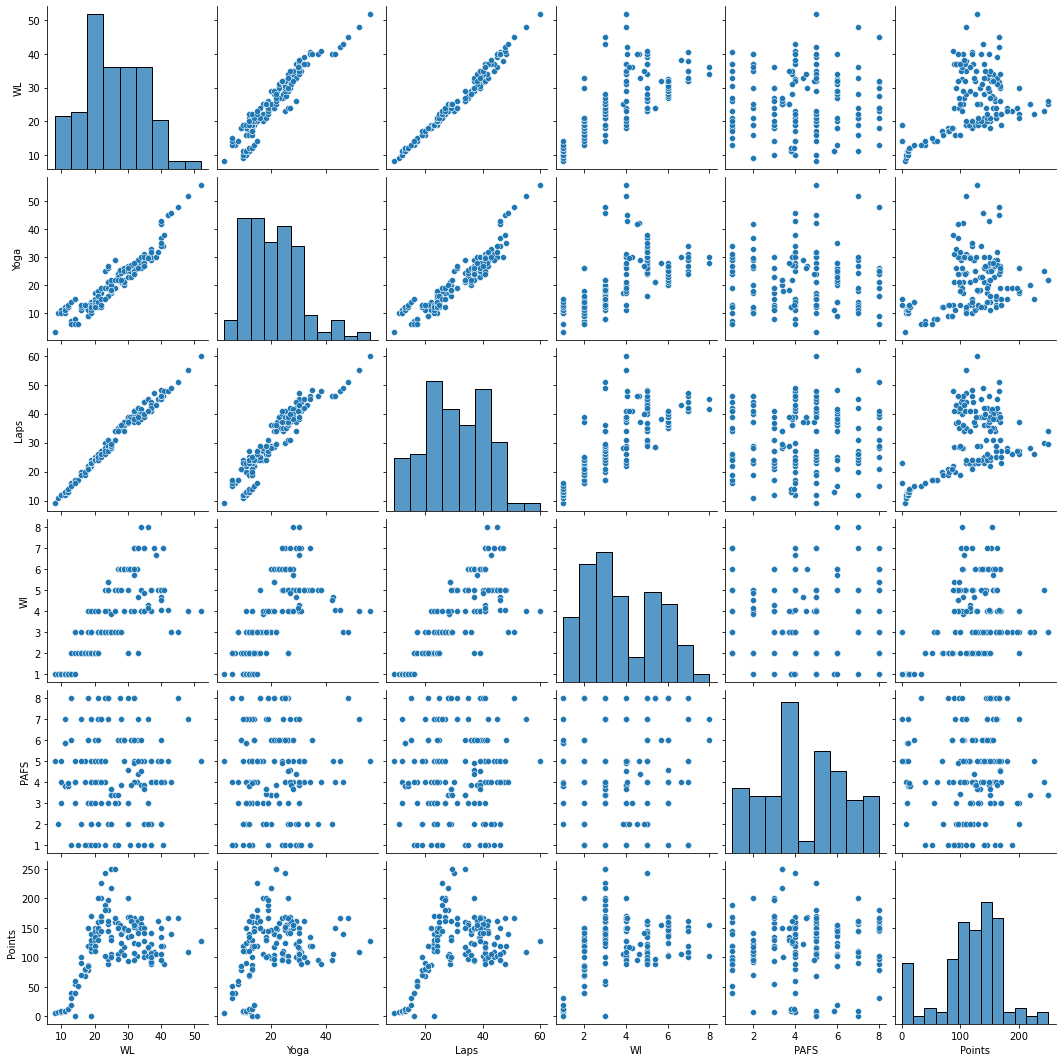

In [57]:
#scatter pairplot
sns.pairplot(df_new,kind='scatter')
plt.show()

__Implementation of Chatterjee correlation__

In [58]:
#function for finding chatterejee correlation coefficient
def chatterjee_corr(df,x,y):
    N=df.shape[0]
    df_rank=df

    df_rank['rank']=df_rank[y].rank()
    #print(df_rank['rank'])

    df_rank['rank_x']=df_rank[x].rank()

    df_rank=df_rank.sort_values(by='rank_x')

    #1-3*(abs(sum(xri-1 - Xir))/n square-1

    #Diff function --> summation -> absolute

    chatt_corr=1- (3*df_rank['rank'].diff().abs().sum() )/ (pow(N,2)-1)

    return chatt_corr

In [59]:
for i in df_new.columns:
    print(f"\nThe chatterjee coeff for {i}, points is {chatterjee_corr(df_new,i,'Points')}")


The chatterjee coeff for WL, points is 0.4062872405999589

The chatterjee coeff for Yoga, points is 0.2911444421614958

The chatterjee coeff for Laps, points is 0.4229299363057325

The chatterjee coeff for WI, points is 0.39198685021573865

The chatterjee coeff for PAFS, points is 0.0019930141771111742

The chatterjee coeff for Team, points is 0.3502568317238546

The chatterjee coeff for Points, points is 0.9810149989726731


__Implementation of ANOVA__

In [60]:
#step 1 Take an independant random sample
import random
nba_id = list(df.index.unique())
random.seed(13)
sample_match_id = random.sample(nba_id,50)
sample_df = df_new[df_new.index.isin(sample_match_id)].reset_index(drop = True)
sample_df

,WL,Yoga,Laps,WI,PAFS,Team,Points,rank,rank_x
0,26.000000,29.000000,34.000000,5.000000,1.000000,Lakers,159,126.5,126.5
1,28.000000,24.366748,35.000000,5.000000,7.000000,Lakers,110,62.5,62.5
2,30.000000,25.000000,39.000000,6.000000,8.000000,Lakers,147,106.0,106.0
3,32.712197,28.000000,39.000000,6.000000,4.000000,Lakers,155,121.5,121.5
4,30.604567,25.000000,39.000000,6.000000,1.000000,Lakers,168,140.5,140.5
5,32.624370,26.000000,40.000000,6.000000,6.000000,Lakers,102,48.0,48.0
6,35.000000,31.000000,44.000000,7.000000,5.000000,Lakers,109,59.0,59.0
7,36.000000,30.000000,45.000000,8.000000,7.000000,Lakers,103,49.5,49.5
8,40.701081,34.000000,46.000000,7.000000,1.000000,Lakers,119,69.0,69.0
9,13.000000,7.000000,16.000000,2.000000,1.000000,Lakers,40,18.5,18.5


In [61]:
sample_df = sample_df[['Team','Points']]
groups = sample_df.groupby('Team').count().reset_index()
groups

,Team,Points
0,Bulls,6
1,Clippers,3
2,Lakers,14
3,Porcupines,2
4,Trailblazers,19
5,Warriors,5


In [62]:
# Step2 Check for normality
import scipy.stats as stats

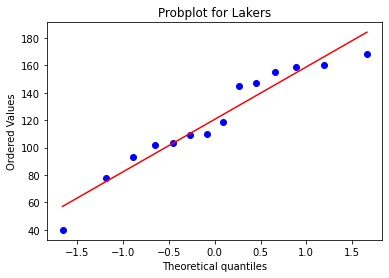

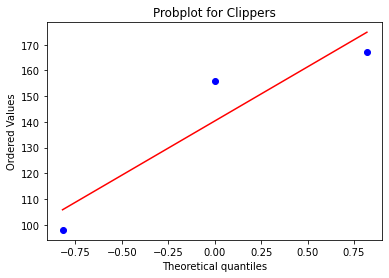

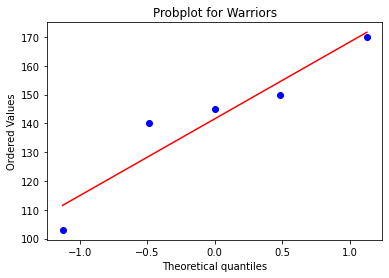

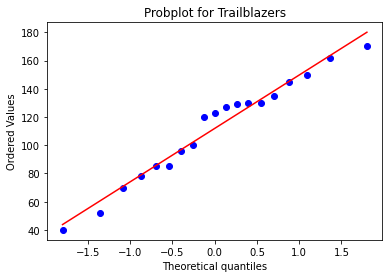

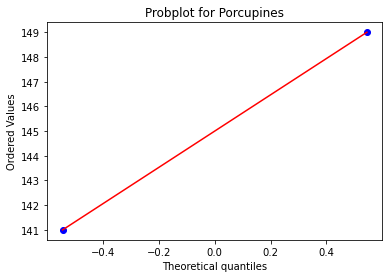

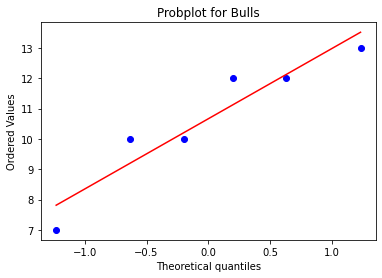

In [63]:
unique_teams = sample_df['Team'].unique()
for i in unique_teams:
    stats.probplot(sample_df[sample_df['Team'] == i]['Points'],dist = 'norm',plot = plt)
    plt.title(f'Probplot for {i}')
    plt.show()

In [64]:
ratio=sample_df.groupby('Team').std().max()/sample_df.groupby('Team').std().min()
ratio

Points    17.161002
dtype: float64

__Creating ANOVA table__

In [65]:
#implement anova from scratch

data=[['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]

anova_table=pd.DataFrame(data,columns=['Variation','SS','df','MS','F value','P value','F critical'])

anova_table.set_index('Variation',inplace=True)

In [66]:
x_bar=sample_df['Points'].mean()

#porcupines - 2 overall 10 8  
SSTR=sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [67]:
anova_table['SS']['Between Groups']=SSTR['Points'].sum()

In [68]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,70869.7,,,,,
Within Groups,,,,,,
Total,,,,,,


In [69]:
SSE=(sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2
SSE

,Points
Team,
Bulls,23.333333
Clippers,2748.666667
Lakers,17727.428571
Porcupines,32.000000
Trailblazers,23834.947368
Warriors,2381.200000


In [70]:
anova_table['SS']['Within Groups']=SSE['Points'].sum()
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,70869.7,,,,,
Within Groups,46747.6,,,,,
Total,,,,,,


In [71]:
total=SSE['Points'].sum()+SSTR['Points'].sum()
anova_table['SS']['Total']=total
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,70869.7,,,,,
Within Groups,46747.6,,,,,
Total,117617,,,,,


In [72]:
anova_table['df']['Between Groups']=sample_df['Team'].nunique()-1
anova_table['df']['Within Groups']=sample_df.shape[0]-sample_df['Team'].nunique()
anova_table['df']['Total']=sample_df.shape[0]-1
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,70869.7,5,,,,
Within Groups,46747.6,43,,,,
Total,117617,48,,,,


In [73]:
anova_table['MS'] = anova_table['SS']/anova_table['df']
anova_table['F value']['Between Groups']=anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']

anova_table['P value']['Between Groups']=1-stats.f.cdf(anova_table['F value']['Between Groups'],
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,70869.7,5,14173.9,13.0377,9.6692e-08,
Within Groups,46747.6,43,1087.15,,,
Total,117617,48,2450.36,,,


In [74]:
alpha=0.05

hypothesis_type="two tailed"

if hypothesis_type=="two tailed":
    alpha=alpha/2


anova_table['F critical']['Between Groups']=stats.f.ppf(1-alpha,
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,70869.7,5,14173.9,13.0377,9.6692e-08,2.87872
Within Groups,46747.6,43,1087.15,,,
Total,117617,48,2450.36,,,


In [75]:
# Pvalue approach

print("Approach for p-value ")

conclusion="Failed to reject null hypothesis"

if anova_table['P value']['Between Groups']<=alpha:
    conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and p-value is ",anova_table['P value']['Between Groups'] )

print(conclusion)

Approach for p-value 
F value for the table is  13.037667008320753 and p-value is  9.669197231776394e-08
Null hypothesis is rejected


In [76]:
# Fcritical approach

print("Approach for f-critical ")

conclusion="Failed to reject null hypothesis"

if anova_table['F value']['Between Groups']>anova_table['F critical']['Between Groups']:
    conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and f-critical value is ",anova_table['F critical']['Between Groups'] )

print(conclusion)

Approach for f-critical 
F value for the table is  13.037667008320753 and f-critical value is  2.878715790727257
Null hypothesis is rejected


__Data Preprocessing__

In [77]:
## Processing data for modelling
#one hot encoding
one_hot_df=pd.get_dummies(df_clean,columns=['Team'],drop_first=True)
one_hot_df.head()

,Points,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
0,242,23.0,25.0,30.0,5.0,4.0,0,1,0,0,0
1,144,24.0,26.0,31.0,5.0,8.0,0,1,0,0,0
2,156,24.0,27.0,31.0,5.0,7.0,0,1,0,0,0
3,159,26.0,29.0,34.0,5.0,1.0,0,1,0,0,0
4,106,27.0,NaN,34.0,5.0,6.0,0,1,0,0,0


In [78]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [79]:
X=one_hot_df[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers',
       'Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]

y=one_hot_df['Points']

#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("X train dimension is ",X_train.shape)
print("y train dimension is ",y_train.shape)
print("X test dimension is ",X_test.shape)
print("y test dimension is ",y_test.shape)

X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)


In [80]:
#Start Imputing here

imputer=LGBMImputer(n_iter=15,verbose=True)

X_train_full=imputer.fit_transform(X_train)

X_train_clean=pd.DataFrame(X_train_full,columns=X_train.columns)

X_train_clean.head()

  0%|          | 0/5 [00:00<?, ?it/s]

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
95,22.000000,13.0,25.0,3.0,5.000000,0,0,0,1,0
91,21.000000,18.0,24.0,2.0,2.000000,0,0,0,1,0
112,34.000000,26.0,39.0,4.0,4.478717,0,0,0,1,0
33,35.395766,34.0,46.0,7.0,1.000000,0,1,0,0,0
62,14.000000,8.0,17.0,3.0,4.000000,0,0,0,0,1


In [81]:
result=sm.OLS(y_train,X_train_clean).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Points   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              116.8
Date:                Fri, 13 Jan 2023   Prob (F-statistic):                    4.52e-55
Time:                        19:25:29   Log-Likelihood:                         -630.29
No. Observations:                 124   AIC:                                      1281.
Df Residuals:                     114   BIC:                                      1309.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [82]:
X_const=sm.add_constant(X_train_clean)

result=sm.OLS(y_train,X_const).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     10.24
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           4.12e-12
Time:                        19:25:29   Log-Likelihood:                -629.76
No. Observations:                 124   AIC:                             1282.
Df Residuals:                     113   BIC:                             1313.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -17.6276     17.93

In [83]:
X_test.head()

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
77,16.0,13.0,19.0,2.0,5.0,0,0,0,1,0
120,37.0,33.0,43.0,5.0,2.0,0,0,0,1,0
92,21.0,16.0,24.0,3.0,5.0,0,0,0,1,0
27,33.0,29.0,42.0,7.0,7.0,0,1,0,0,0
13,30.0,27.0,37.0,6.0,NaN,0,1,0,0,0


In [84]:
test=pd.DataFrame(imputer.transform(X_test))

  0%|          | 0/5 [00:00<?, ?it/s]

In [85]:
res=result.predict(sm.add_constant(test[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

In [87]:
#RMSE, MAE, MSE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE of the model is",mean_absolute_error(y_test,res))
print("MSE of the model is",mean_squared_error(y_test,res))
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,res)))
print("R2 score for test is",r2_score(y_test,res))

MAE of the model is 29.24157377938146
MSE of the model is 1314.0990194742521
RMSE of the model is 36.25050371338655
R2 score for test is 0.43068672523163287


In [88]:
def create_polynomial_plot(feature,label):
    #convert to 1d
    x_coordinates=feature
    y_coordinates=np.squeeze(label)
    linear_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,1))
    quadratic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,2))
    cubic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,3))
    values=np.linspace(x_coordinates.min(),x_coordinates.max(),len(x_coordinates))
    plt.scatter(x_coordinates,y_coordinates,color='blue')
    plt.plot(values,linear_poly(values),color='cyan',label='Linear Model')
    plt.plot(values,quadratic_poly(values),color='red',label='Quadratic Model')
    plt.plot(values,cubic_poly(values),color='yellow',label='Cubic Model')
    plt.xlabel("%s from data" %(feature.name))
    plt.ylabel("Points")
    plt.rcParams["figure.figsize"]=(12,6)
    plt.legend()
    plt.title("Linear vs Quadratic")
    plt.show()


  


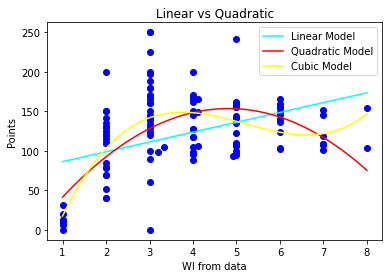

In [89]:
create_polynomial_plot(X_train_clean.WI,y_train)

In [90]:
########
#1 Create a set of polynomial features

#2 Apply a linear regression 
########

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_train_clean)

poly.fit(X_poly,y_train)

PolynomialFeatures()

In [93]:
from sklearn import linear_model

lm=linear_model.LinearRegression()

lm.fit(X_poly,y_train)

LinearRegression()

In [95]:
#Doing predictions on test data

predictions=lm.predict(poly.fit_transform(test))

print("R2 score for test is",r2_score(y_test,predictions))

R2 score for test is -3.6986905643518497


In [96]:
 print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,predictions)))

RMSE of the model is 104.1422156117298
